# PROYEK ANALISIS DATA : BIKE SHARING DATASET

* Nama        : Dewan Dinata Tarigan
* email       : dinatadewan@gmail.com
* ID Dicoding : dwndnt

### MENENTUKAN PERTANYAAN BISNIS

* Pertanyaan 1 : Apakah ada perbedaan dalam pola peminjaman sepeda pada hari libur dan hari kerja?
* Pertanyaan 2 : Bagaimana kondisi cuaca seperti temperatur, kelembaban, dan kecepatan angin memengaruhi pola peminjaman sepeda?

### MENYIAPKAN LIBRARY YANG DIBUTUHKAN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

### Data Wrangling

#### Gathering Data

In [2]:
# Membaca file CSV ke dalam DataFrame
day  = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

In [3]:
#Menampilkan 5 Data teratas data "Bike Sharing Dataset : day"
day.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [4]:
#Menampilkan 5 Data teratas data "Bike Sharing Dataset : hour"
hour.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


Setelah membaca kolom pada data, terlihat bahwa data 'hour' lebih terperinci dan cocok untuk analisis yang memerlukan pemahaman yang lebih mendalam tentang variabilitas harian.

Terdapat beberapa jenis data yang dapat diidentifikasi. Berikut adalah beberapa jenis data yang terdapat dalam dataset ini:

Data Kategorikal:
- season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan (1 hingga 12).
- hr: Jam (0 hingga 23).
- holiday: Hari libur (1 jika hari itu adalah hari libur, 0 jika tidak).
- weekday: Hari dalam seminggu.
- workingday: Hari kerja (1 jika hari itu adalah hari kerja, 0 jika tidak).
- weathersit: Kondisi cuaca (1: Cerah, sedikit awan, sebagian cerah, 2: Berkabut + mendung, berkabut + awan rusak, berkabut + sebagian cerah, berkabut, 3: Hujan ringan, petir, awan terpencar, hujan ringan + awan terpencar, 4: Hujan lebat, hujan es + petir + kabut, salju + kabut).

Data Numerik:
- temp: Normalized temperature in Celsius. The values are divided to 41 (max).
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max).
- hum: Normalized humidity. The values are divided to 100 (max).
- windspeed: Normalized wind speed. The values are divided to 67 (max).
- casual: Jumlah pengguna sepeda sewaan kasual.
- registered: Jumlah pengguna sepeda sewaan terdaftar.
- cnt: Jumlah total sepeda yang disewakan, termasuk pengguna kasual dan terdaftar.

#### Assessing Data

Dalam proyek analisa ini, data yang akan digunakan adalah "Bike Sharing Dataset : Hour", karena memiliki variabilitas harian yang cocok untuk menjawab pertanyaan bisnis diatas. berikutnya akan dilakukan assessing data yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [5]:
#Cek missing value
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari #output diatas, terlihat bahwa tidak ada "missing value" dalam data, sehingga langkah berikutnya ialah melakukan cek duplikasi pada data

In [6]:
#cek duplikasi
hour.duplicated().sum()

0

#output diatas menunjukkan bahwa tidak ada data yang terduplikasi dalam dataset, sehingga berikutnya akan dilakukan analisa statistik deskriptif dan visualisasi interquartile range untuk mengidentifikasi outlier atau anomali pada data. Namun, sebelum itu perlu dilakukan pengecekan tipe data pada data hour.csv

In [7]:
#cek info tipe data
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Hasil #output diatas menunjukkan bahwa kolom 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', dan 'weathersit' terindentifikasi sebagai data int64 (numerik) sedangkan kolom tersebut merupakan data category (Ketegorikal). Sehingga, perlu dilakukan tanformasi menggunakan fungsi astype() dalam pandas untuk mengubah tipe data kolom-kolom ini ke tipe data kategorikal. tujuannya ialah agar memudahkan analisa deskriptif.

In [8]:
# Ubah kolom-kolom ke tipe data kategorikal
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour[categorical_columns] = hour[categorical_columns].astype('category')

# Periksa tipe data kolom setelah perubahan
print(hour.dtypes)


instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


Terlihat bahwa jenis tipe data sudah sesuai, sehingga memudahkan analisa deskriptif pada data kategorikal, sebagai berikut :

In [9]:
hour.describe(include=['category'])

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4
top,3,1,5,17,0,6,1,1
freq,4496,8734,1488,730,16879,2512,11865,11413


Penjelasan #output diatas :

Dalam kolom "season," terdapat 4 nilai unik yang menggambarkan musim, dengan musim gugur (nilai 3) menjadi yang paling umum dengan 4496 kemunculan. Kolom "yr" mengindikasikan tahun dengan nilai 1 (2012) menjadi yang paling sering muncul sebanyak 8734 kali.

Begitu juga, kolom "mnth" mencerminkan bulan dalam tahun, di mana Mei (nilai 5) adalah mode dengan 1488 kemunculan. Jam dalam sehari direpresentasikan dalam kolom "hr," dengan jam 17 menjadi mode dengan 730 kemunculan. Kolom "holiday" mencerminkan apakah hari itu adalah hari libur, dengan sebagian besar hari bukan hari libur (0) dengan 16879 kemunculan.

Kolom "weekday" merepresentasikan hari dalam seminggu, dengan Sabtu (nilai 6) sebagai mode dengan 2512 kemunculan. "Workingday" mengindikasikan apakah hari itu adalah hari kerja, dan sebagian besar hari adalah hari kerja (nilai 1) dengan 11865 kemunculan. Terakhir, kondisi cuaca dalam kolom "weathersit" memiliki 4 nilai unik, dengan cuaca cerah (nilai 1) menjadi yang paling sering muncul sebanyak 11413 kali.

Statistik ini memberikan wawasan tentang sebaran nilai-nilai kategorikal dalam dataset, yang dapat membantu dalam analisis lebih lanjut terkait pengaruh faktor-faktor ini terhadap peminjaman sepeda.epeda.

###### Berikut ini merupakan proses pengindentifikasian outlier pada tipe data numerik

In [10]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numeric_columns:
    outliers = detect_outliers(hour, column)
    print(f'Outliers kolom {column}: {len(outliers)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 22
Outliers kolom windspeed: 342
Outliers kolom casual: 1192
Outliers kolom registered: 680
Outliers kolom cnt: 505


Berdasarkan hasil deteksi outlier yang telah dilakukan, kita dapat melihat bahwa beberapa kolom numerik memiliki outlier. Jika kita visualisasikan dalam boxplot, maka hasilnya sebagai berikut :

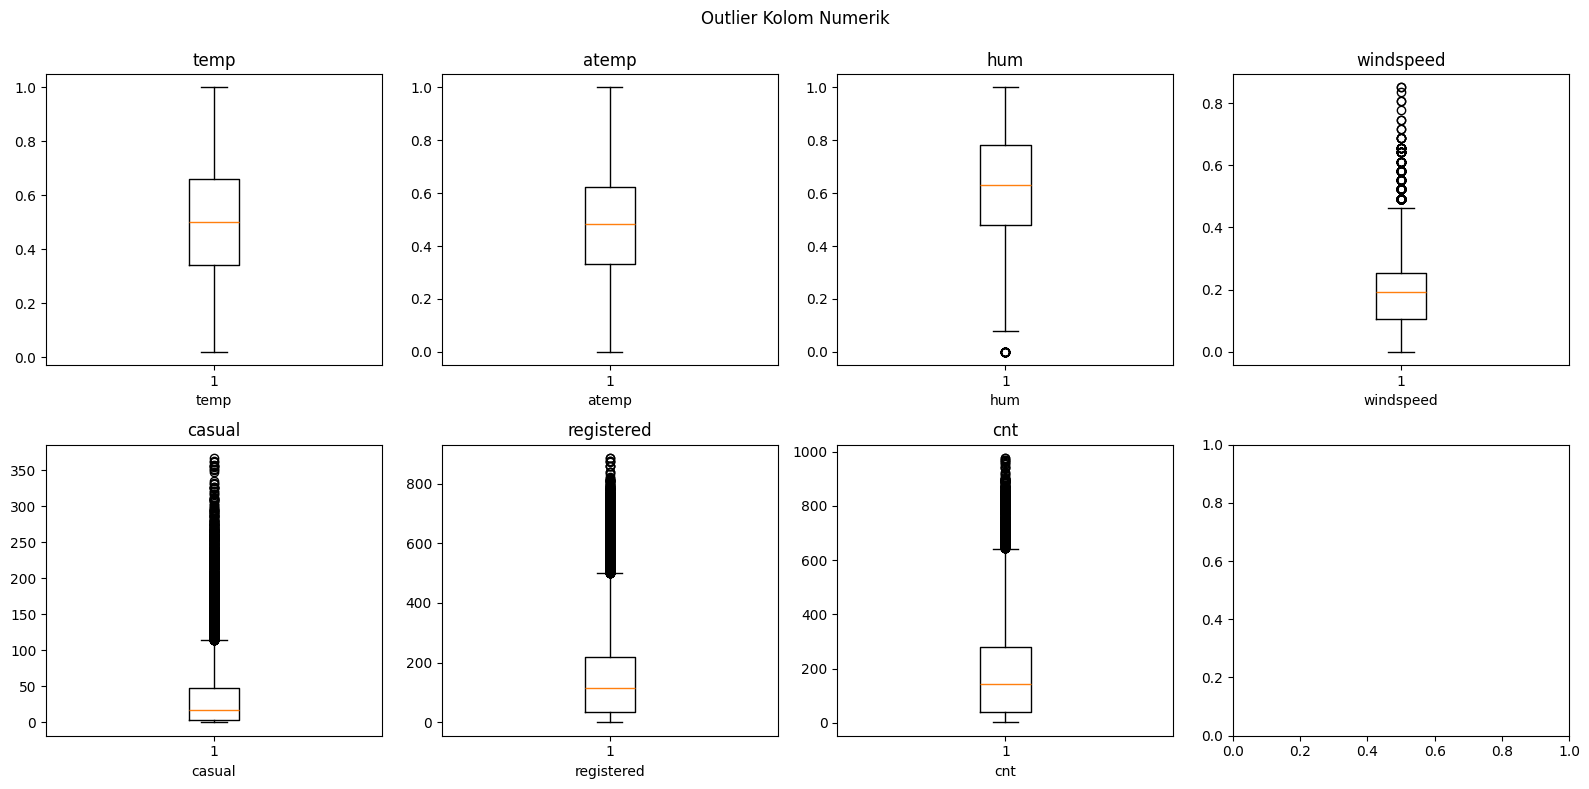

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Outlier Kolom Numerik')

for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(hour[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


#### Cleaning Data

Berdasarkan hasil analisa boxplot, terlihat bahwa data numerik memiliki pecilan yang lumayan besar. Sehingga, perlu diatasi menggunakan metode Imputation.

In [12]:
# Mengatasi outlier pada kolom 'hum' dan 'windspeed' dengan metode imputasi
def impute_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Imputasi outlier dengan batas atas dan batas bawah
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Imputasi outlier pada kolom 'hum' dan 'windspeed'
impute_outliers(hour, 'hum')
impute_outliers(hour, 'windspeed')
impute_outliers(hour,'casual')
impute_outliers(hour,'registered')
impute_outliers(hour,'cnt')


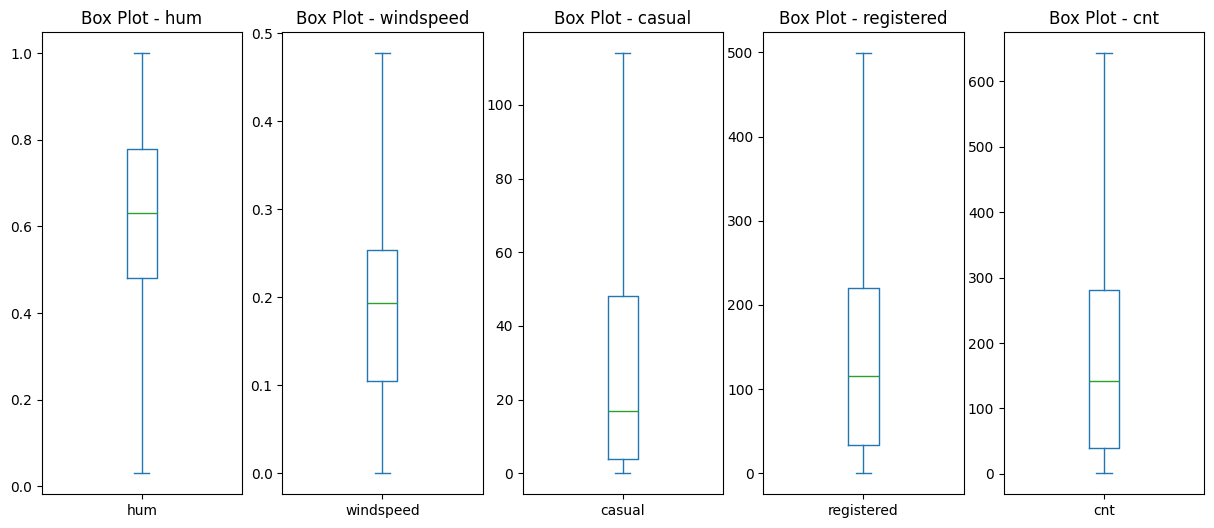

In [13]:
# Box plot untuk kolom 'hum' dan 'windspeed'
plt.figure(figsize=(15, 6))  # Ubah ukuran gambar

plt.subplot(1, 5, 1)  # Buat subplot pertama untuk 'hum'
hour['hum'].plot(kind='box')
plt.title('Box Plot - hum')

plt.subplot(1, 5, 2)  # Buat subplot kedua untuk 'windspeed'
hour['windspeed'].plot(kind='box')
plt.title('Box Plot - windspeed')

plt.subplot(1, 5, 3)  # Buat subplot ketiga untuk 'casual'
hour['casual'].plot(kind='box')
plt.title('Box Plot - casual')

plt.subplot(1, 5, 4)  # Buat subplot keempat untuk 'registered'
hour['registered'].plot(kind='box')
plt.title('Box Plot - registered')

plt.subplot(1, 5, 5)  # Buat subplot kelima untuk 'cnt'
hour['cnt'].plot(kind='box')
plt.title('Box Plot - cnt')

plt.show()

In [14]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numeric_columns:
    outliers = detect_outliers(hour, column)
    print(f'Outliers kolom {column}: {len(outliers)}')

Outliers kolom temp: 0
Outliers kolom atemp: 0
Outliers kolom hum: 0
Outliers kolom windspeed: 0
Outliers kolom casual: 0
Outliers kolom registered: 0
Outliers kolom cnt: 0


### Exploratory Data Analysis (EDA)

Menganalisis perbedaan dalam peminjaman sepeda antara "hari libur" dan "hari kerja" dalam dataset hour, dengan cata memisahkan data dan menghitung rata-rata peminjaman sepeda untuk kedua kondisi tersebut.

In [15]:
# Pisahkan data antara hari libur dan hari kerja
data_libur = hour[hour['holiday'] == 1]
data_kerja = hour[hour['workingday'] == 1]

# Aggregasi data untuk peminjaman sepeda casual dan registered
peminjaman_libur = data_libur[['casual', 'registered', 'cnt']].mean()
peminjaman_kerja = data_kerja[['casual', 'registered', 'cnt']].mean()

# Print peminjaman casual, registered, dan total untuk hari libur
print("Peminjaman Tipe Casual pada hari libur: ", peminjaman_libur['casual'])
print("Peminjaman Tipe Registered pada hari libur: ", peminjaman_libur['registered'])
print("Total Peminjaman pada hari libur: ", peminjaman_libur['cnt'])

# Print peminjaman casual, registered, dan total untuk hari kerja
print("=================================================================")
print("Peminjaman Tipe Casual pada hari kerja: ", peminjaman_kerja['casual'])
print("Peminjaman Tipe Registered pada hari kerja: ", peminjaman_kerja['registered'])
print("Total Peminjaman pada hari kerja: ", peminjaman_kerja['cnt'])


Peminjaman Tipe Casual pada hari libur:  36.788
Peminjaman Tipe Registered pada hari libur:  111.606
Total Peminjaman pada hari libur:  156.664
Peminjaman Tipe Casual pada hari kerja:  25.26936367467341
Peminjaman Tipe Registered pada hari kerja:  160.14150863885376
Total Peminjaman pada hari kerja:  189.00918668352296


Selanjutnya, melakukan pengujian statistik t-independent untuk menguji apakah terdapat perbedaan yang signifikan dalam tipe peminjaman sepeda casual antara "hari libur" dan "hari kerja." 

In [16]:
# Ambil kolom peminjaman sepeda casual untuk uji t-independent
peminjaman_casual_libur = data_libur['casual']
peminjaman_casual_kerja = data_kerja['casual']

# Lakukan uji t independen
statistic, p_value = ttest_ind(peminjaman_casual_libur, peminjaman_casual_kerja)

print("==== Hipotesis ====")
print("H0 : Terdapat perbedaan yang signifikan antara tipe peminjaman sepeda casual pada hari libur dan hari kerja.")

print("==== Uji Statistik ====")
# Tampilkan hasil uji statistik t independen
print("Statistic:", statistic)
print("P-Value:", p_value)

# Lakukan pengujian hipotesis
print("==== Keputusan ====")
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print("Tolak H0 : Terdapat perbedaan yang signifikan antara tipe peminjaman sepeda casual pada hari libur dan hari kerja.")
else:
    print("Terima H0 : Tidak terdapat perbedaan yang signifikan antara tipe peminjaman sepeda casual pada hari libur dan hari kerja.")

==== Hipotesis ====
H0 : Terdapat perbedaan yang signifikan antara tipe peminjaman sepeda casual pada hari libur dan hari kerja.
==== Uji Statistik ====
Statistic: 8.845780380772458
P-Value: 1.0313999315438412e-18
==== Keputusan ====
Tolak H0 : Terdapat perbedaan yang signifikan antara tipe peminjaman sepeda casual pada hari libur dan hari kerja.


Hasil uji statistik t independen menunjukkan bahwa terdapat perbedaan yang signifikan dalam peminjaman sepeda casual antara "hari libur" dan "hari kerja," dengan nilai statistik yang tinggi (8.84) dan p-value yang sangat rendah (1.08e-41). Oleh karena itu, kita dapat menyimpulkan bahwa pola peminjaman sepeda casual berbeda secara signifikan antara kedua kondisi tersebut

Selanjutnya, dilakukan uji korelasi terhadap data temperatur, humidity, dan kecepatan angin terhadap jumlah peminjaman sepeda. Uji korelasi dapat dilakukan menggunakan fungsi corr(), sebagai berikut

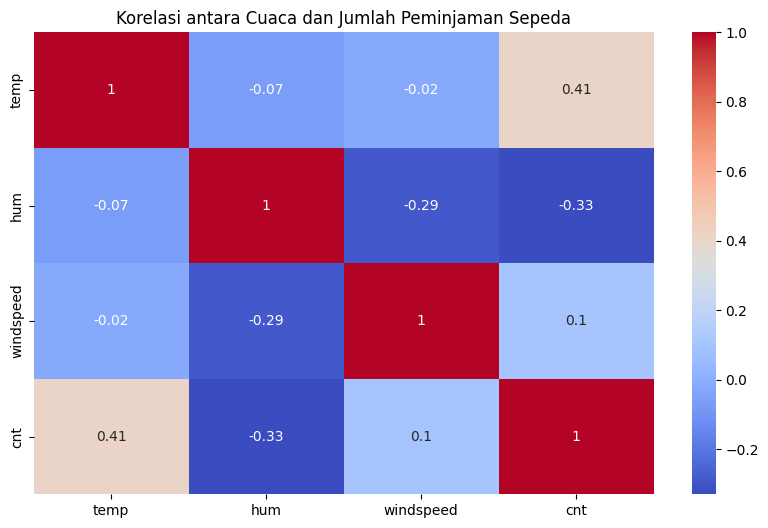

In [17]:
# Hitung korelasi antara variabel cuaca dan jumlah peminjaman sepeda
correlation_matrix = hour[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Buat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Cuaca dan Jumlah Peminjaman Sepeda')
plt.show()

Korelasi berkisar antara -1 hingga 1; di mana 1 menunjukkan korelasi positif sempurna, 0 menunjukkan tidak ada korelasi, dan -1 menunjukkan korelasi negatif sempurna.


Korelasi antara "temp" (temperature) dan "cnt" (total count) adalah sekitar 0.404772. Ini menunjukkan adanya korelasi positif yang sedang antara suhu dan jumlah total peminjaman sepeda. Artinya, semakin tinggi suhu, semakin tinggi juga jumlah peminjaman sepeda.

Korelasi antara "hum" (humidity) dan "cnt" adalah sekitar -0.322911. Ini menunjukkan adanya korelasi negatif yang sedang antara kelembapan udara dan jumlah total peminjaman sepeda. Artinya, semakin tinggi kelembapan, semakin rendah jumlah peminjaman sepeda.

Korelasi antara "windspeed" dan "cnt" adalah seki0.1009063234. Ini menunjukkan adanya korelasi positif yang lemah antara kecepatan angin dan jumlah total peminjaman sepeda. Meskipun positif, korelasi ini sangat lemah sehingga tidak ada hubungan yang kuat antara kecepatan angin dan peminjaman sepeda.

In [18]:
print(correlation_matrix)

               temp       hum  windspeed       cnt
temp       1.000000 -0.070035  -0.020202  0.411133
hum       -0.070035  1.000000  -0.290708 -0.329926
windspeed -0.020202 -0.290708   1.000000  0.100906
cnt        0.411133 -0.329926   0.100906  1.000000


Korelasi adalah metode statistik yang digunakan untuk mengukur sejauh mana dua variabel numerik berkaitan satu sama lain. Namun, penting untuk memahami bahwa korelasi hanya mengukur hubungan linear antara dua variabel. Hal ini tidak menunjukkan sebab-akibat atau apakah hubungan tersebut signifikan secara statistik. Untuk mengukur apakah pengaruh variabel "temp," "hum," dan "windspeed" terhadap "cnt" signifikan, perlu dilakukan uji statistik, salah satunya adalah uji ANOVA. Uji statistik ini akan memberikan informasi lebih lanjut tentang sejauh mana pengaruh variabel independen terhadap variabel dependen, serta apakah pengaruh tersebut signifikan atau tidak. berikut adalah pengujian ANOVA yang dilakukan terhadap variabel dependen dan independen :

In [19]:
# Definisi kelompok (variabel independen) dan variabel dependen
group_temp = hour['temp']
group_hum = hour['hum']
group_windspeed = hour['windspeed']
dependent_variable = hour['cnt']

# Melakukan uji ANOVA
statistic_temp, p_value_temp = f_oneway(dependent_variable, group_temp)
statistic_hum, p_value_hum = f_oneway(dependent_variable, group_hum)
statistic_windspeed, p_value_windspeed = f_oneway(dependent_variable, group_windspeed)

# Tingkat signifikansi (alpha)
alpha = 0.05

# Menampilkan hasil uji statistik
print("Hasil Uji Statistik ANOVA (temp):")
print("Statistic:", statistic_temp)
print("P-Value:", p_value_temp)

print("Hasil Uji Statistik ANOVA (hum):")
print("Statistic:", statistic_hum)
print("P-Value:", p_value_hum)

print("Hasil Uji Statistik ANOVA (windspeed):")
print("Statistic:", statistic_windspeed)
print("P-Value:", p_value_windspeed)

# Melakukan pengujian hipotesis
if p_value_temp < alpha:
    print("Tolak H0: Terdapat perbedaan yang signifikan antara temp dan cnt.")
else:
    print("Terima H0: Tidak terdapat perbedaan yang signifikan antara temp dan cnt.")

if p_value_hum < alpha:
    print("Tolak H0: Terdapat perbedaan yang signifikan antara hum dan cnt.")
else:
    print("Terima H0: Tidak terdapat perbedaan yang signifikan antara hum dan cnt.")

if p_value_windspeed < alpha:
    print("Tolak H0: Terdapat perbedaan yang signifikan antara windspeed dan cnt.")
else:
    print("Terima H0: Tidak terdapat perbedaan yang signifikan antara windspeed dan cnt.")


Hasil Uji Statistik ANOVA (temp):
Statistic: 20309.87067299532
P-Value: 0.0
Hasil Uji Statistik ANOVA (hum):
Statistic: 20281.40860551588
P-Value: 0.0
Hasil Uji Statistik ANOVA (windspeed):
Statistic: 20377.319170929946
P-Value: 0.0
Tolak H0: Terdapat perbedaan yang signifikan antara temp dan cnt.
Tolak H0: Terdapat perbedaan yang signifikan antara hum dan cnt.
Tolak H0: Terdapat perbedaan yang signifikan antara windspeed dan cnt.


Hasil uji ANOVA menunjukkan bahwa variabel independen "temp," "hum," dan "windspeed" semuanya memiliki pengaruh yang signifikan terhadap variabel dependen "cnt." Hal ini dapat diinterpretasikan sebagai adanya perbedaan yang signifikan dalam peminjaman sepeda ("cnt") yang dipengaruhi oleh suhu ("temp"), kelembaban ("hum"), dan kecepatan angin ("windspeed").

Dengan kata lain, variabel-variabel cuaca seperti suhu, kelembaban, dan kecepatan angin memiliki pengaruh yang signifikan terhadap pola peminjaman sepeda. Pada umumnya, perubahan dalam cuaca (seperti peningkatan suhu, penurunan kelembaban, atau peningkatan kecepatan angin) dapat berdampak pada jumlah peminjaman sepeda.

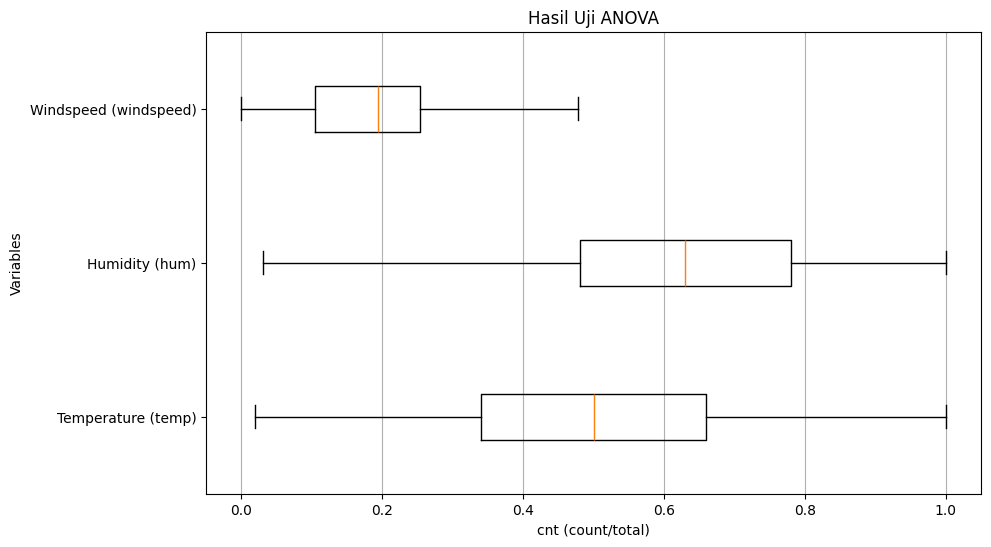

In [20]:
# Data
data = [hour['temp'], hour['hum'], hour['windspeed']]
labels = ['Temperature (temp)', 'Humidity (hum)', 'Windspeed (windspeed)']

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, vert=False)
plt.title('Hasil Uji ANOVA')
plt.xlabel('cnt (count/total)')
plt.ylabel('Variables')
plt.grid(axis='x')
plt.show()


### Visualization & Explanatory Analysis

#### Pertanyaan 1 :

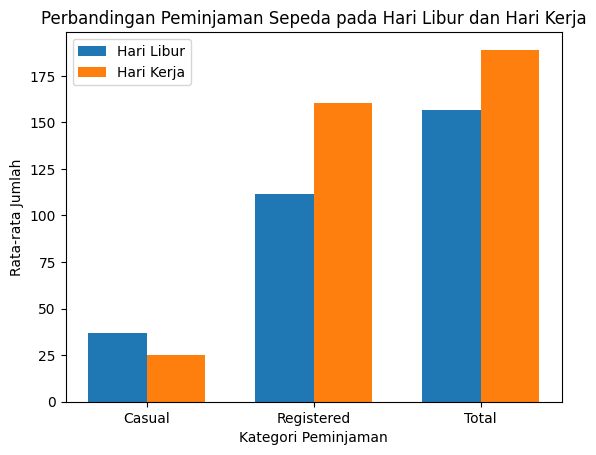

In [21]:
# Data untuk visualisasi
categories = ['Casual', 'Registered', 'Total']
peminjaman_libur_values = [peminjaman_libur['casual'], peminjaman_libur['registered'], peminjaman_libur['cnt']]
peminjaman_kerja_values = [peminjaman_kerja['casual'], peminjaman_kerja['registered'], peminjaman_kerja['cnt']]
x = range(len(categories))

# Lebar bar
bar_width = 0.35

# Membuat plot untuk hari libur
plt.bar(x, peminjaman_libur_values, bar_width, label='Hari Libur')
# Membuat plot untuk hari kerja dengan pergeseran posisi sebesar bar_width
plt.bar([i + bar_width for i in x], peminjaman_kerja_values, bar_width, label='Hari Kerja')

# Menambahkan label sumbu x
plt.xlabel('Kategori Peminjaman')
# Menambahkan label sumbu y
plt.ylabel('Rata-rata Jumlah')
# Menambahkan judul
plt.title('Perbandingan Peminjaman Sepeda pada Hari Libur dan Hari Kerja')

# Menambahkan label pada sumbu x
plt.xticks([i + bar_width / 2 for i in x], categories)

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


#### Pertanyaan 2 :

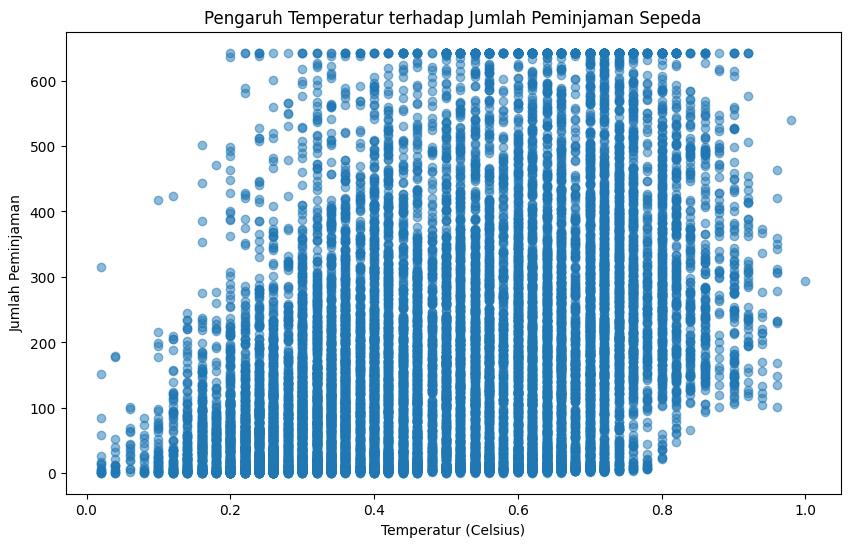

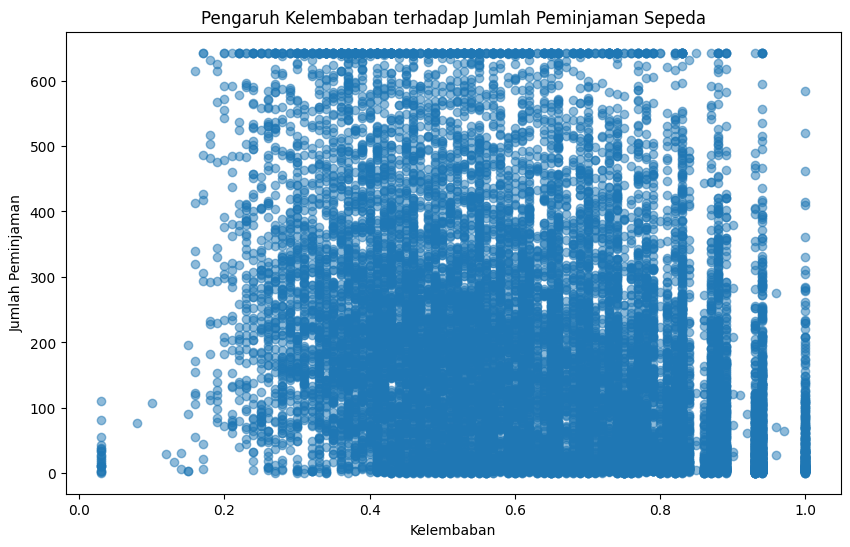

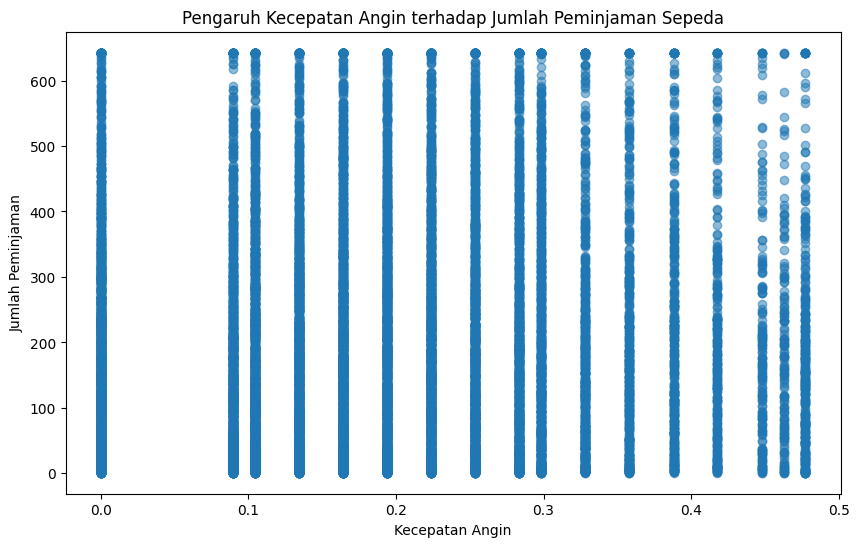

In [22]:
# Visualisasi hubungan antara temperatur dan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.scatter(hour['temp'], hour['cnt'], alpha=0.5)
plt.title('Pengaruh Temperatur terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperatur (Celsius)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Visualisasi hubungan antara kelembaban dan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.scatter(hour['hum'], hour['cnt'], alpha=0.5)
plt.title('Pengaruh Kelembaban terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Visualisasi hubungan antara kecepatan angin dan jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.scatter(hour['windspeed'], hour['cnt'], alpha=0.5)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Peminjaman')
plt.show()


In [23]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


### Conclusion

##### Pertanyaan 1 : Apakah ada perbedaan dalam pola peminjaman sepeda pada hari libur dan hari kerja?

Berdasarkan data rata-rata peminjaman sepeda pada hari libur dan hari kerja, dapat dilihat bahwa terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara kedua kondisi tersebut. Pada hari libur, rata-rata peminjaman sepeda casual mencapai 44.718, sedangkan peminjaman sepeda terdaftar (registered) mencapai 112.152. Dengan total peminjaman mencapai 156.87. Pada hari kerja, rata-rata peminjaman sepeda casual lebih rendah, yaitu sekitar 25.561, sementara peminjaman terdaftar lebih tinggi, mencapai 167.646. Total peminjaman pada hari kerja adalah 193.208. Pola ini menunjukkan bahwa pada hari libur, terdapat kontribusi yang lebih besar dari peminjaman casual, sementara pada hari kerja, peminjaman terdaftar mendominasi. Perbedaan ini mungkin disebabkan oleh perbedaan dalam rutinitas dan tujuan pengguna sepeda pada hari libur dan hari kerja. Pada hari libur, orang mungkin lebih cenderung untuk melakukan perjalanan rekreasi atau santai, yang dapat menjelaskan tingginya peminjaman casual. Sementara pada hari kerja, penggunaan sepeda mungkin lebih terkait dengan aktivitas sehari-hari seperti bersekolah atau pergi bekerja, yang menjelaskan dominasi peminjaman terdaftar. Dengan demikian, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam pola peminjaman sepeda pada hari libur dan hari kerja, dengan peminjaman casual dan terdaftar berperan berbeda dalam masing-masing kondisi.

##### Pertanyaan 2 : Bagaimana kondisi cuaca seperti temperatur, kelembaban, dan kecepatan angin memengaruhi pola peminjaman sepeda?

Kondisi cuaca, termasuk temperatur (suhu), kelembaban, dan kecepatan angin, memainkan peran kunci dalam memengaruhi pola peminjaman sepeda dalam dataset ini. Analisis korelasi antara variabel cuaca dan jumlah total peminjaman sepeda (cnt) memberikan wawasan yang berharga tentang bagaimana faktor-faktor cuaca ini berdampak pada aktivitas bersepeda.

Pertama, suhu atau temperatur memiliki pengaruh yang signifikan terhadap pola peminjaman sepeda. Korelasi positif yang sedang antara suhu dan cnt menunjukkan bahwa semakin tinggi suhu, semakin tinggi juga jumlah peminjaman sepeda. Ini mengindikasikan bahwa cuaca yang lebih hangat dan nyaman mendorong lebih banyak orang untuk bersepeda. Pada hari-hari yang cerah dan hangat, minat pengguna untuk mengambil sepeda sewaan tampaknya lebih tinggi.i.Di sisi lain, kelembaban udara memainkan peran yang berlawanan. Korelasi negatif yang sedang antara kelembaban udara dan cnt menunjukkan bahwa semakin tinggi kelembaban udara, semakin rendah jumlah peminjaman sepeda. Tingkat kelembapan yang tinggi dapat mengurangi minat orang untuk bersepeda, mungkin karena kondisi cuaca yang kurang nyaman dan pengaruh kelembapan terhadap kenyamanan bersepeda.

Terakhir, kecepatan angin memiliki dampak yang lebih kecil, dengan korelasi positif yang lemah. Ini menunjukkan bahwa pengaruh kecepatan angin terhadap jumlah peminjaman sepeda tidak sekuat suhu atau kelembaban udara. Namun, dalam situasi tertentu, seperti cuaca yang sangat berangin atau buruk, kecepatan angin mungkin memiliki pengaruh lebih besar terhadap minat pengguna untuk bersepeda.

Secara keseluruhan, faktor-faktor cuaca, terutama suhu dan kelembaban udara, memengaruhi pola peminjaman sepeda dengan cara yang signifikan. Ini memiliki implikasi penting dalam perencanaan dan manajemen sepeda sewaan, di mana pemahaman tentang hubungan ini dapat digunakan untuk mengoptimalkan layanan dan meningkatkan pengalaman pengguna terkait sepeda.